# Flight price prediction

In this project, we aim to predict the prices of flights, based on data collected from March to June 2019.

We have the following input columns -

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

---------------------------------------------------------

Price: The price of the ticket - Output variable

This is a regression problem since the output data is a continuous variable

In [130]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [131]:
#Loading data from csv file

data = pd.read_excel('Data_Train.xlsx')

In [132]:
data.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4802,Air Asia,24/03/2019,Banglore,New Delhi,BLR → DEL,05:50,08:40,2h 50m,non-stop,No info,4284
1137,Jet Airways,1/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:00,6h,1 stop,No info,14714
849,Air Asia,27/05/2019,Delhi,Cochin,DEL → BLR → COK,07:55,13:25,5h 30m,1 stop,No info,6451
7918,Jet Airways,27/06/2019,Delhi,Cochin,DEL → BOM → COK,07:05,12:35,5h 30m,1 stop,No info,14714
5313,Jet Airways,24/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,20:45 25 May,24h 45m,1 stop,In-flight meal not included,10844
7287,Air India,6/05/2019,Kolkata,Banglore,CCU → BBI → BOM → BLR,12:00,11:10 07 May,23h 10m,2 stops,No info,10676
6740,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → BOM → COK,04:45,19:45,15h,1 stop,No info,10782
5039,Jet Airways,27/06/2019,Delhi,Cochin,DEL → BOM → COK,22:50,19:00 28 Jun,20h 10m,1 stop,In-flight meal not included,10262
8718,Jet Airways,03/03/2019,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 07 Mar,13h 5m,1 stop,In-flight meal not included,13502
3463,IndiGo,09/03/2019,Banglore,New Delhi,BLR → IDR → DEL,17:55,22:55,5h,1 stop,No info,6351


# Exploratory data analysis and data modeling

In [133]:
#Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [134]:
#Checking data stats

data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [135]:
#Checking NaN value count

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [136]:
#Creating list of category columns

category = ['Airline','Source','Destination','Additional_Info']

In [137]:
#Checking unique values in Airlines column
for i in category:
    print(i, data[i].unique())
    print('----------------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
----------------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
----------------------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
----------------------------------------------


In [138]:
#Treating the date column

data.Date_of_Journey = data.Date_of_Journey.str.split('/')

In [139]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [140]:
data['Date'] = data.Date_of_Journey.str[0]
data['Month'] = data.Date_of_Journey.str[1]
data['Year'] = data.Date_of_Journey.str[2]

In [141]:
data.Date

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date, Length: 10683, dtype: object

We have successfully separated the date, month and year from date column, to feed our model with respective data

In [142]:
# Treating the Route column

data.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [143]:
data.Route = data.Route.str.split('→')

In [144]:
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [145]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [146]:
#Since max number of stops are 4, there will be maximum 6 cities in the longest route.

#We will divide the route into 6 cities and fill the values

data['City1'] = data.Route.str[0]
data['City2'] = data.Route.str[1]
data['City3'] = data.Route.str[2]
data['City4'] = data.Route.str[3]
data['City5'] = data.Route.str[4]
data['City6'] = data.Route.str[5]

In [147]:
data.City6.value_counts()

City6
 DEL    1
Name: count, dtype: int64

In [148]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]",08:20,11:20,3h,non-stop,No info,7229,27,04,2019,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,BLR,DEL,NaN,NaN,NaN,NaN


In [149]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]",08:20,11:20,3h,non-stop,No info,7229,27,04,2019,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,BLR,DEL,NaN,NaN,NaN,NaN


In [150]:
#Treating dep time column

data.Dep_Time = data.Dep_Time.str.split(':')

In [151]:
data['Dep_Time_Hour'] = data.Dep_Time.str[0]
data['Dep_Time_Min'] = data.Dep_Time.str[1]

In [152]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month,Year,City1,City2,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",01:10 22 Mar,2h 50m,non-stop,No info,...,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",13:15,7h 25m,2 stops,No info,...,05,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",04:25 10 Jun,19h,2 stops,No info,...,06,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",23:30,5h 25m,1 stop,No info,...,05,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",21:35,4h 45m,1 stop,No info,...,03,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",22:25,2h 30m,non-stop,No info,...,04,2019,CCU,BLR,NaN,NaN,NaN,NaN,19,55
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",23:20,2h 35m,non-stop,No info,...,04,2019,CCU,BLR,NaN,NaN,NaN,NaN,20,45
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",11:20,3h,non-stop,No info,...,04,2019,BLR,DEL,NaN,NaN,NaN,NaN,08,20
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",14:10,2h 40m,non-stop,No info,...,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,11,30


In [153]:
#Treating the arrival time column

data.Arrival_Time = data.Arrival_Time.str.split(' ')

In [154]:
data['Arrival_date'] = data.Arrival_Time.str[1]

In [155]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,City1,City2,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,...,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20,22
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,...,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,...,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25,10
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,...,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,...,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",[22:25],2h 30m,non-stop,No info,...,2019,CCU,BLR,NaN,NaN,NaN,NaN,19,55,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",[23:20],2h 35m,non-stop,No info,...,2019,CCU,BLR,NaN,NaN,NaN,NaN,20,45,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",[11:20],3h,non-stop,No info,...,2019,BLR,DEL,NaN,NaN,NaN,NaN,08,20,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",[14:10],2h 40m,non-stop,No info,...,2019,BLR,DEL,NaN,NaN,NaN,NaN,11,30,NaN


In [156]:
data['Time_of_arrival'] = data.Arrival_Time.str[0]

In [157]:
data['Time_of_arrival'] = data.Time_of_arrival.str.split(':')

In [158]:
data['Arrival_Time_Hour'] = data.Time_of_arrival.str[0]
data['Arrival_Time_Min'] = data.Time_of_arrival.str[1]

In [159]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,...,NaN,NaN,NaN,NaN,22,20,22,"[01, 10]",01,10
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,...,BBI,BLR,NaN,NaN,05,50,NaN,"[13, 15]",13,15
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,...,BOM,COK,NaN,NaN,09,25,10,"[04, 25]",04,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,...,BLR,NaN,NaN,NaN,18,05,NaN,"[23, 30]",23,30
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,...,DEL,NaN,NaN,NaN,16,50,NaN,"[21, 35]",21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",[22:25],2h 30m,non-stop,No info,...,NaN,NaN,NaN,NaN,19,55,NaN,"[22, 25]",22,25
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",[23:20],2h 35m,non-stop,No info,...,NaN,NaN,NaN,NaN,20,45,NaN,"[23, 20]",23,20
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",[11:20],3h,non-stop,No info,...,NaN,NaN,NaN,NaN,08,20,NaN,"[11, 20]",11,20
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",[14:10],2h 40m,non-stop,No info,...,NaN,NaN,NaN,NaN,11,30,NaN,"[14, 10]",14,10


In [160]:
#Treating the duration column

data.Duration = data.Duration.str.split(' ')

In [161]:
data['Travel_hours'] = data.Duration.str[0]

In [162]:
data['Travel_hours']

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Travel_hours, Length: 10683, dtype: object

In [163]:
data['Travel_hours'] = data['Travel_hours'].str.split('h')

In [164]:
data['Travel_hours'] = data['Travel_hours'].str[0]

In [165]:
data.Travel_hours = data.Travel_hours

In [166]:
data.Travel_hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Travel_hours, Length: 10683, dtype: object

In [167]:
data['Travel_mins'] = data.Duration.str[1]

In [168]:
data.Travel_mins = data.Travel_mins.str.split('m')

In [169]:
data.Travel_mins = data.Travel_mins.str[0]

In [170]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",non-stop,No info,...,NaN,NaN,22,20,22,"[01, 10]",01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],"[7h, 25m]",2 stops,No info,...,NaN,NaN,05,50,NaN,"[13, 15]",13,15,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",[19h],2 stops,No info,...,NaN,NaN,09,25,10,"[04, 25]",04,25,19,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],"[5h, 25m]",1 stop,No info,...,NaN,NaN,18,05,NaN,"[23, 30]",23,30,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],"[4h, 45m]",1 stop,No info,...,NaN,NaN,16,50,NaN,"[21, 35]",21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",[22:25],"[2h, 30m]",non-stop,No info,...,NaN,NaN,19,55,NaN,"[22, 25]",22,25,2,30
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",[23:20],"[2h, 35m]",non-stop,No info,...,NaN,NaN,20,45,NaN,"[23, 20]",23,20,2,35
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",[11:20],[3h],non-stop,No info,...,NaN,NaN,08,20,NaN,"[11, 20]",11,20,3,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",[14:10],"[2h, 40m]",non-stop,No info,...,NaN,NaN,11,30,NaN,"[14, 10]",14,10,2,40


In [171]:
#Treating the Total Stops column

data.Total_Stops.replace('non-stop','0', inplace = True)

In [172]:
data.Total_Stops.value_counts()

Total_Stops
1 stop     5625
0          3491
2 stops    1520
3 stops      45
4 stops       1
Name: count, dtype: int64

In [173]:
data.Total_Stops.unique()

array(['0', '2 stops', '1 stop', '3 stops', nan, '4 stops'], dtype=object)

In [174]:
data.Total_Stops = data.Total_Stops.str.split(' ')

In [175]:
data.Total_Stops

0               [0]
1        [2, stops]
2        [2, stops]
3         [1, stop]
4         [1, stop]
            ...    
10678           [0]
10679           [0]
10680           [0]
10681           [0]
10682    [2, stops]
Name: Total_Stops, Length: 10683, dtype: object

In [176]:
data.Total_Stops = data.Total_Stops.str[0]

In [177]:
data.Total_Stops

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: object

In [178]:
#Exploring the Additional info column

data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [179]:
data.Additional_Info.replace('No Info', 'No info', inplace = True)

In [180]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [181]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'City1', 'City2',
       'City3', 'City4', 'City5', 'City6', 'Dep_Time_Hour', 'Dep_Time_Min',
       'Arrival_date', 'Time_of_arrival', 'Arrival_Time_Hour',
       'Arrival_Time_Min', 'Travel_hours', 'Travel_mins'],
      dtype='object')

In [182]:
data.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
7119,Jet Airways,"[6, 06, 2019]",Delhi,Cochin,"[DEL , JAI , BOM , COK]","[05, 30]",[19:00],"[13h, 30m]",2,No info,...,NaN,NaN,05,30,NaN,"[19, 00]",19,00,13,30


In [183]:
#Dropping the extra columns to remove the mess from the data

data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','City6','City5', 'Time_of_arrival'], axis =1, inplace = True)

In [184]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,22,20,22,01,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,05,50,NaN,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,06,2019,DEL,LKO,BOM,COK,09,25,10,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,18,05,NaN,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,16,50,NaN,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,04,2019,CCU,BLR,NaN,NaN,19,55,NaN,22,25,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,27,04,2019,CCU,BLR,NaN,NaN,20,45,NaN,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,04,2019,BLR,DEL,NaN,NaN,08,20,NaN,11,20,3,NaN
10681,Vistara,Banglore,New Delhi,0,No info,12648,01,03,2019,BLR,DEL,NaN,NaN,11,30,NaN,14,10,2,40


In [185]:
#Due to multiple columns splitting, we introduced NaN values in our data, checking number of NaN values

data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
City4                9117
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins          1032
dtype: int64

In [186]:
#Since a lot of data is missing in City4 column, dropping it

data.drop(['City4'], axis = 1, inplace = True)

In [187]:
#City1 has 1 empty column, we will check the data and replace it since this implies that the route is not available

data[data['City1'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,09,25,23,40


In [188]:
#We observe that the flight is from Delhi to Cochin, hence filling these values

data['City1'].fillna('DEL',inplace = True)

In [189]:
data['City2'].fillna('COK', inplace = True)

In [190]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   0
City2                   0
City3                3492
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins          1032
dtype: int64

In [191]:
data[data.Total_Stops.isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,DEL,COK,NaN,09,45,07,09,25,23,40


In [192]:
#Filling the stops as 0, this is the same row in which we had the route missing

data['Total_Stops'].fillna('0', inplace = True)

In [193]:
#Filling City3 as None, since the missing values are less, we will assign a separate category to this column as None

data['City3'].fillna('None', inplace = True)

In [194]:
#Filling the null values in Arrival date with values in Departure date, since the Nan values are those dates which departed and arrived on the same date

data['Arrival_date'].fillna(data['Date'], inplace = True)

In [195]:
#Filling Nan values in Travel mins as 0 since the minutes data is not valid for these (reached in hour units)

data['Travel_mins'].fillna(0, inplace = True)

In [196]:
data.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Year                 0
City1                0
City2                0
City3                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_date         0
Arrival_Time_Hour    0
Arrival_Time_Min     0
Travel_hours         0
Travel_mins          0
dtype: int64

The missing values are now successfully treated from our data

In [197]:
#Checking the info column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10683 non-null  object
 10  City2              10683 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Min       10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Min   10683 non-null  objec

In [198]:
#Changing data type of numerical columns from object to int

data.Total_Stops = data.Total_Stops.astype('int64')
data.Date = data.Date.astype('int64')
data.Month = data.Month.astype('int64')
data.Year = data.Year.astype('int64')
data.Dep_Time_Hour = data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Min = data.Dep_Time_Min.astype('int64')
data.Arrival_date = data.Arrival_date.astype('int64')
data.Arrival_Time_Hour = data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Min = data.Arrival_Time_Min.astype('int64')
data.Travel_hours = data.Travel_hours.astype('int64')
data.Travel_mins = data.Travel_mins.astype('int64')

We face error in above conversion of hours column, it says we have value as 5m. Checking this value

In [199]:
data[data['Travel_hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [200]:
#The data seems to be invalid since the flight from mumbai to Hyd cannot be for 5 minutes. Hence dropping this row.

data.drop(index=6474, inplace = True, axis = 0)

In [201]:
data.Travel_hours = data.Travel_hours.astype('int64')

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   Year               10682 non-null  int64 
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Min       10682 non-null  int64 
 14  Arrival_date       10682 non-null  int64 
 15  Arrival_Time_Hour  10682 non-null  int64 
 16  Arrival_Time_Min   10682 non-null  int64 
 17

In [203]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,BLR,DEL,None,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,CCU,IXR,BBI,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,DEL,LKO,BOM,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,CCU,NAG,BLR,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,BLR,NAG,DEL,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,CCU,BLR,None,19,55,9,22,25,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,CCU,BLR,None,20,45,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,BLR,DEL,None,8,20,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,BLR,DEL,None,11,30,1,14,10,2,40


In [204]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'City1', 'City2', 'City3',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Min', 'Travel_hours', 'Travel_mins'],
      dtype='object')

In [205]:
#Creating list of different types of columns

categorical = ['Airline','Source','Destination', 'Additional_Info','City1','City2','City3']
numerical = ['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_date','Arrival_Time_Hour','Arrival_Time_Min','Travel_hours','Travel_mins']

### Plotting the categorical data for analysis

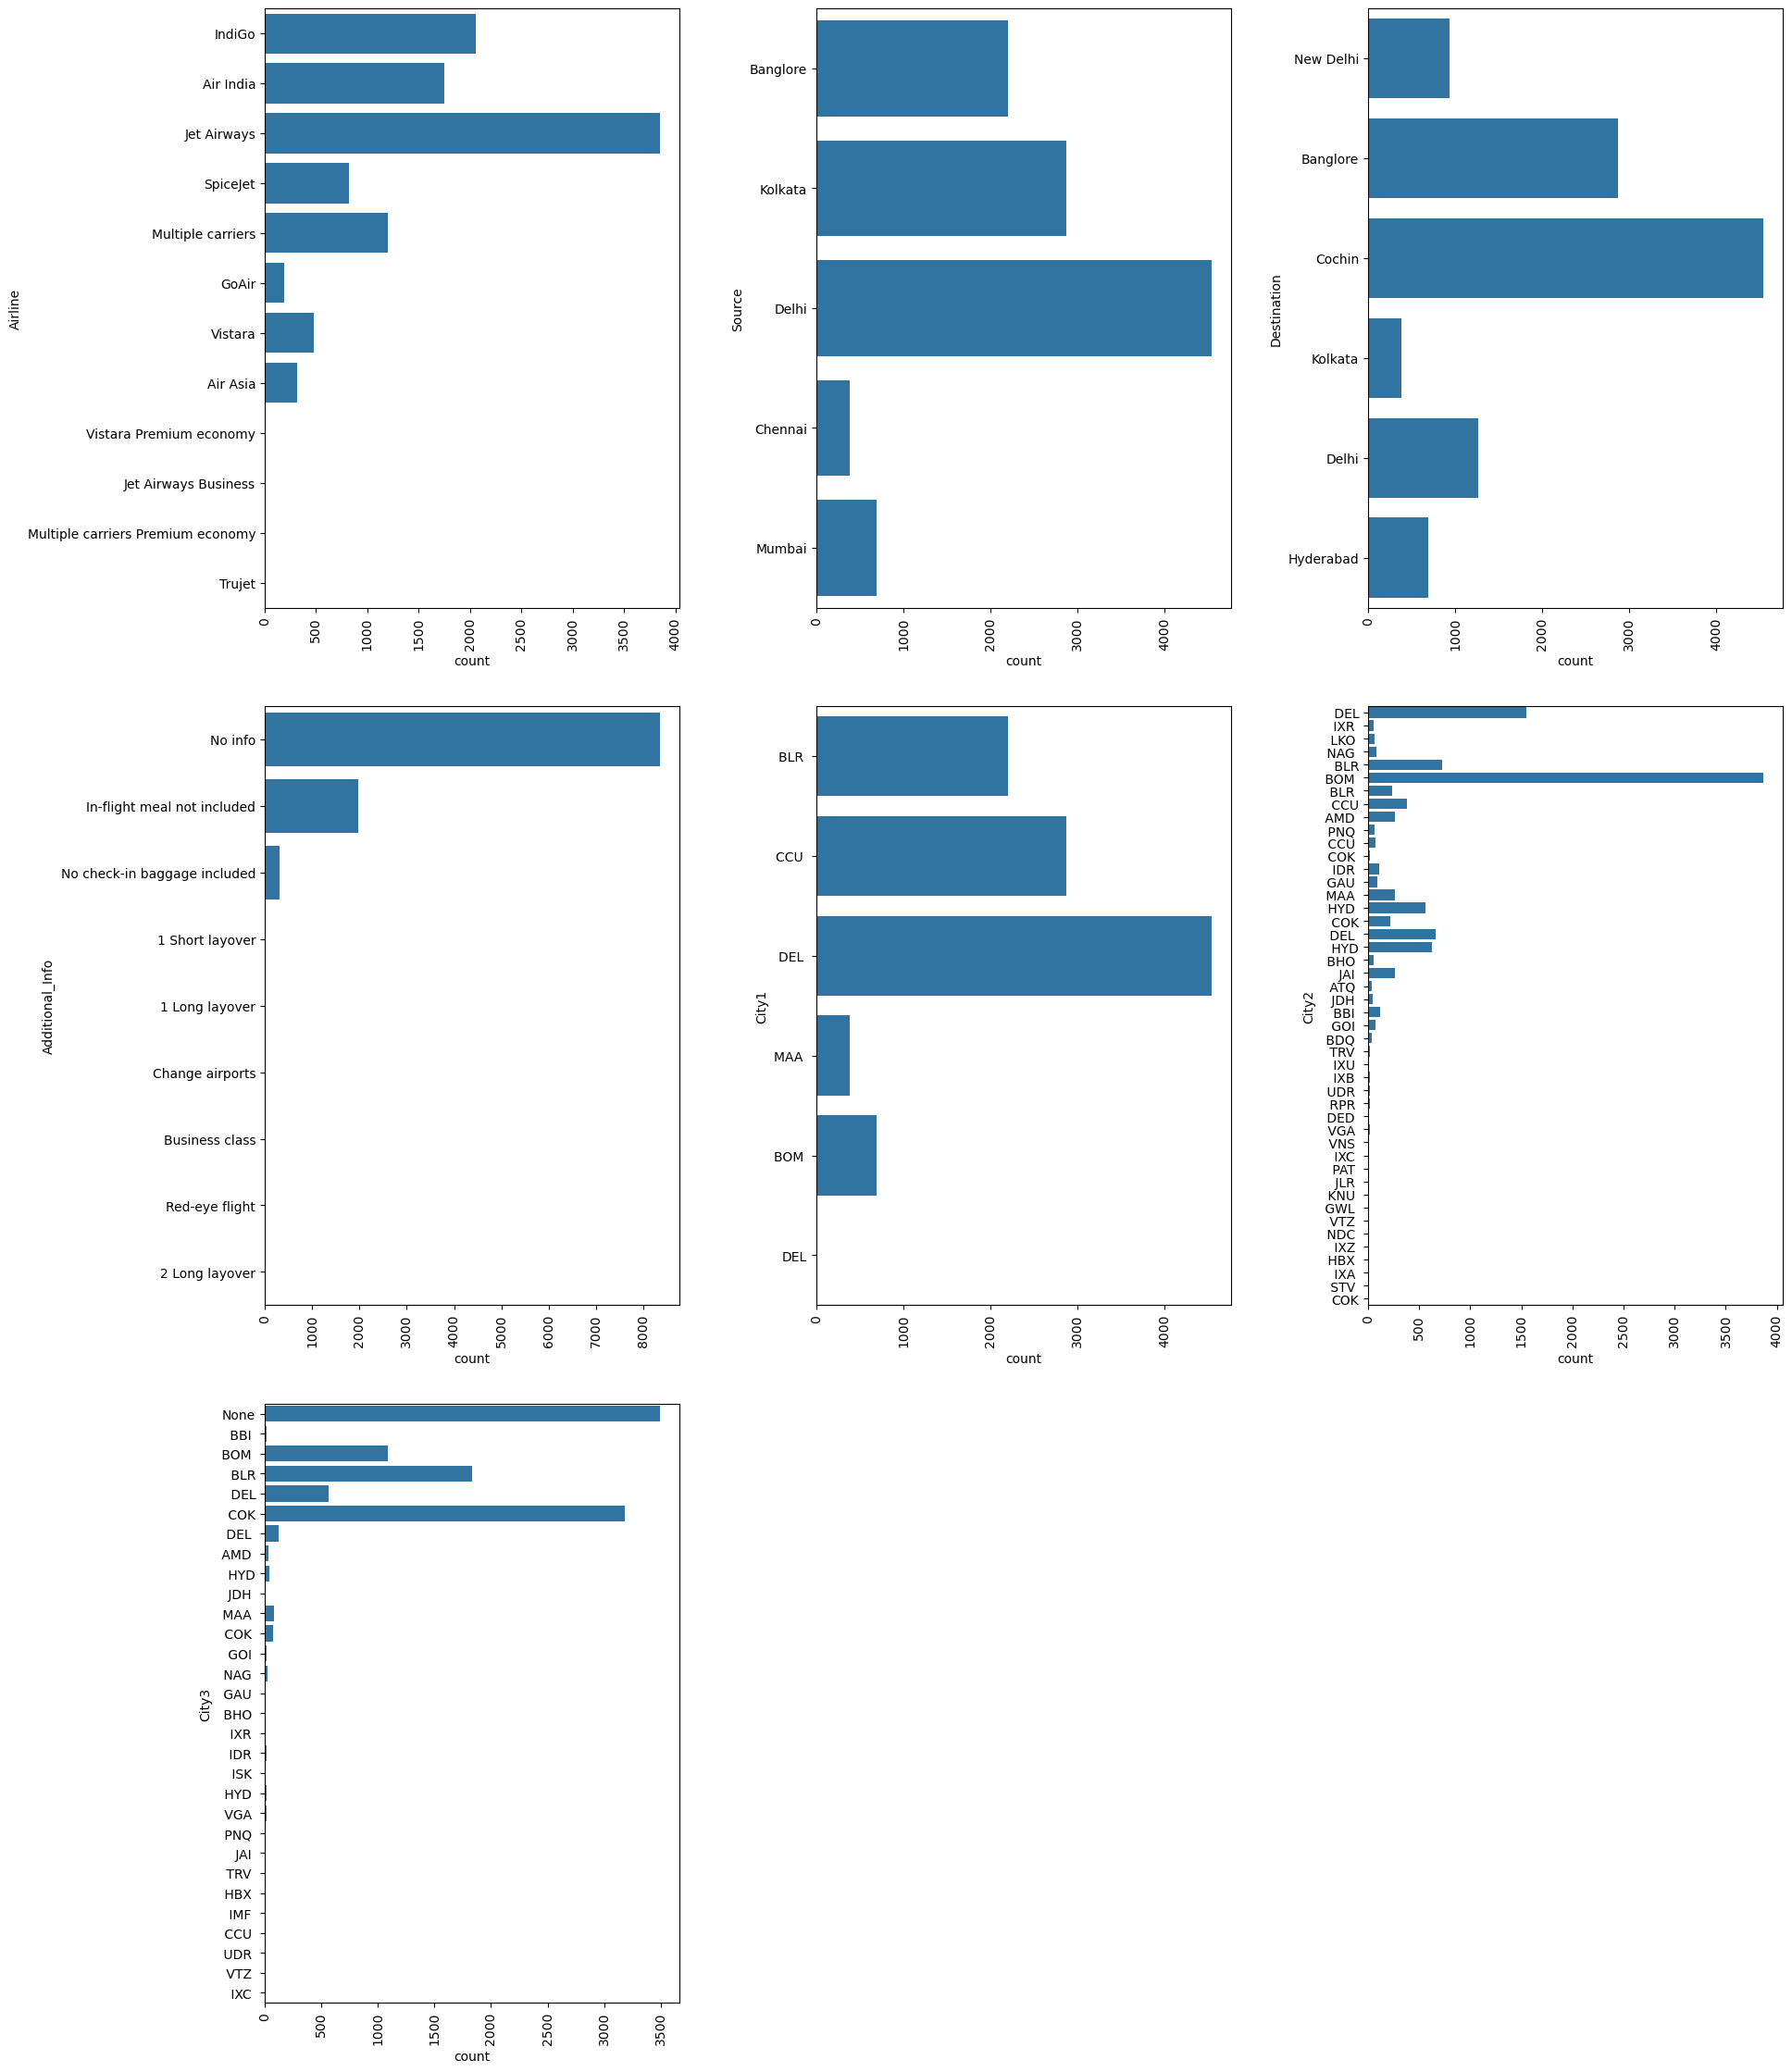

In [206]:
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Exploring numerical columns

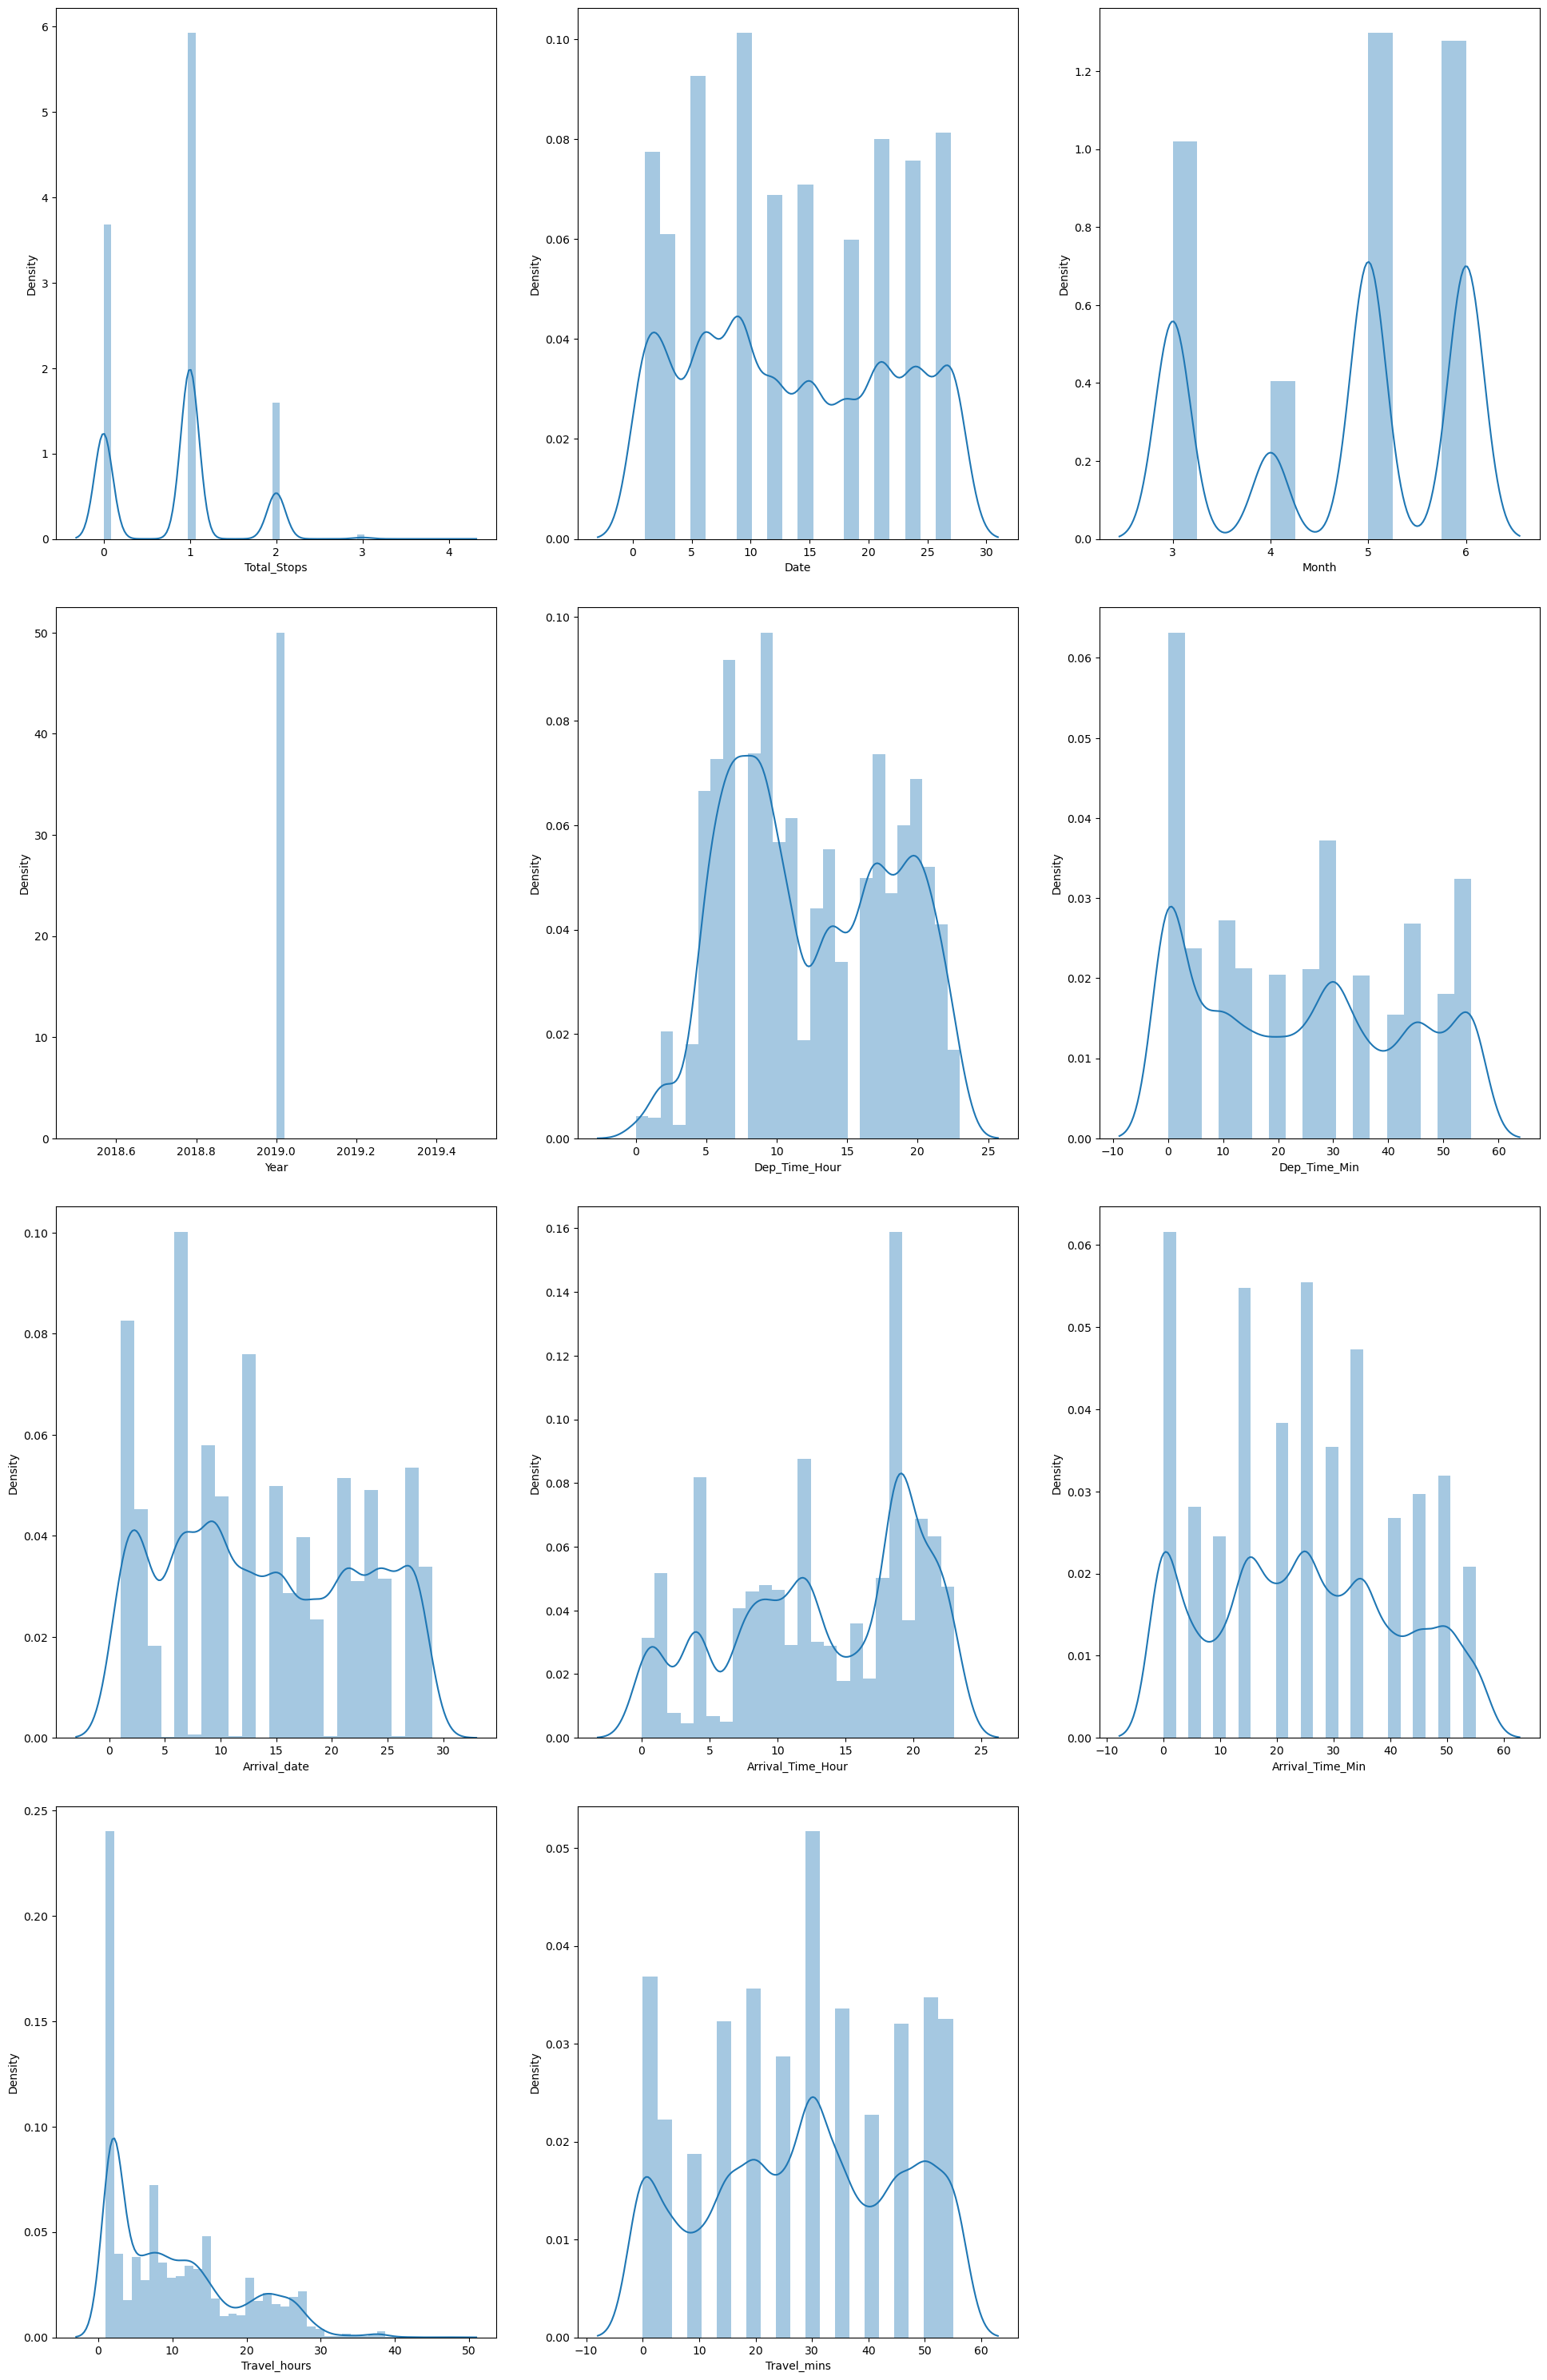

In [207]:
c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(data[i])
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

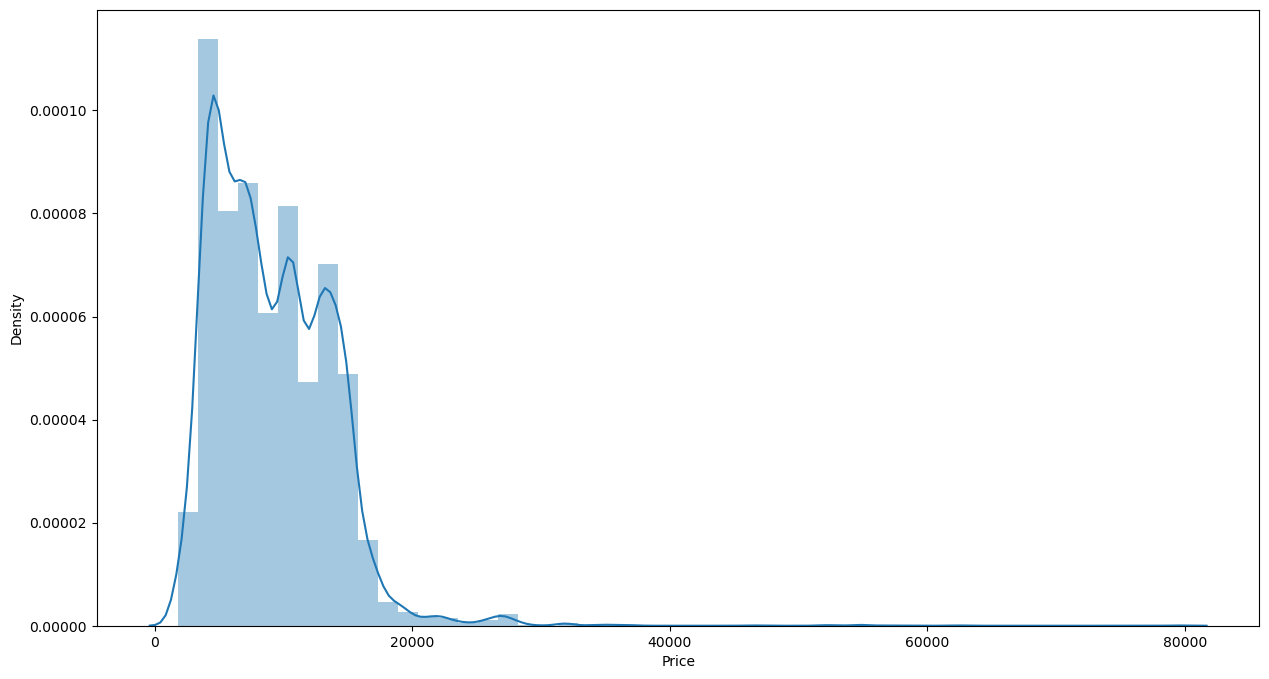

In [208]:
plt.figure(figsize = (15,8))
sns.distplot(data.Price)

### Bivariate analysis

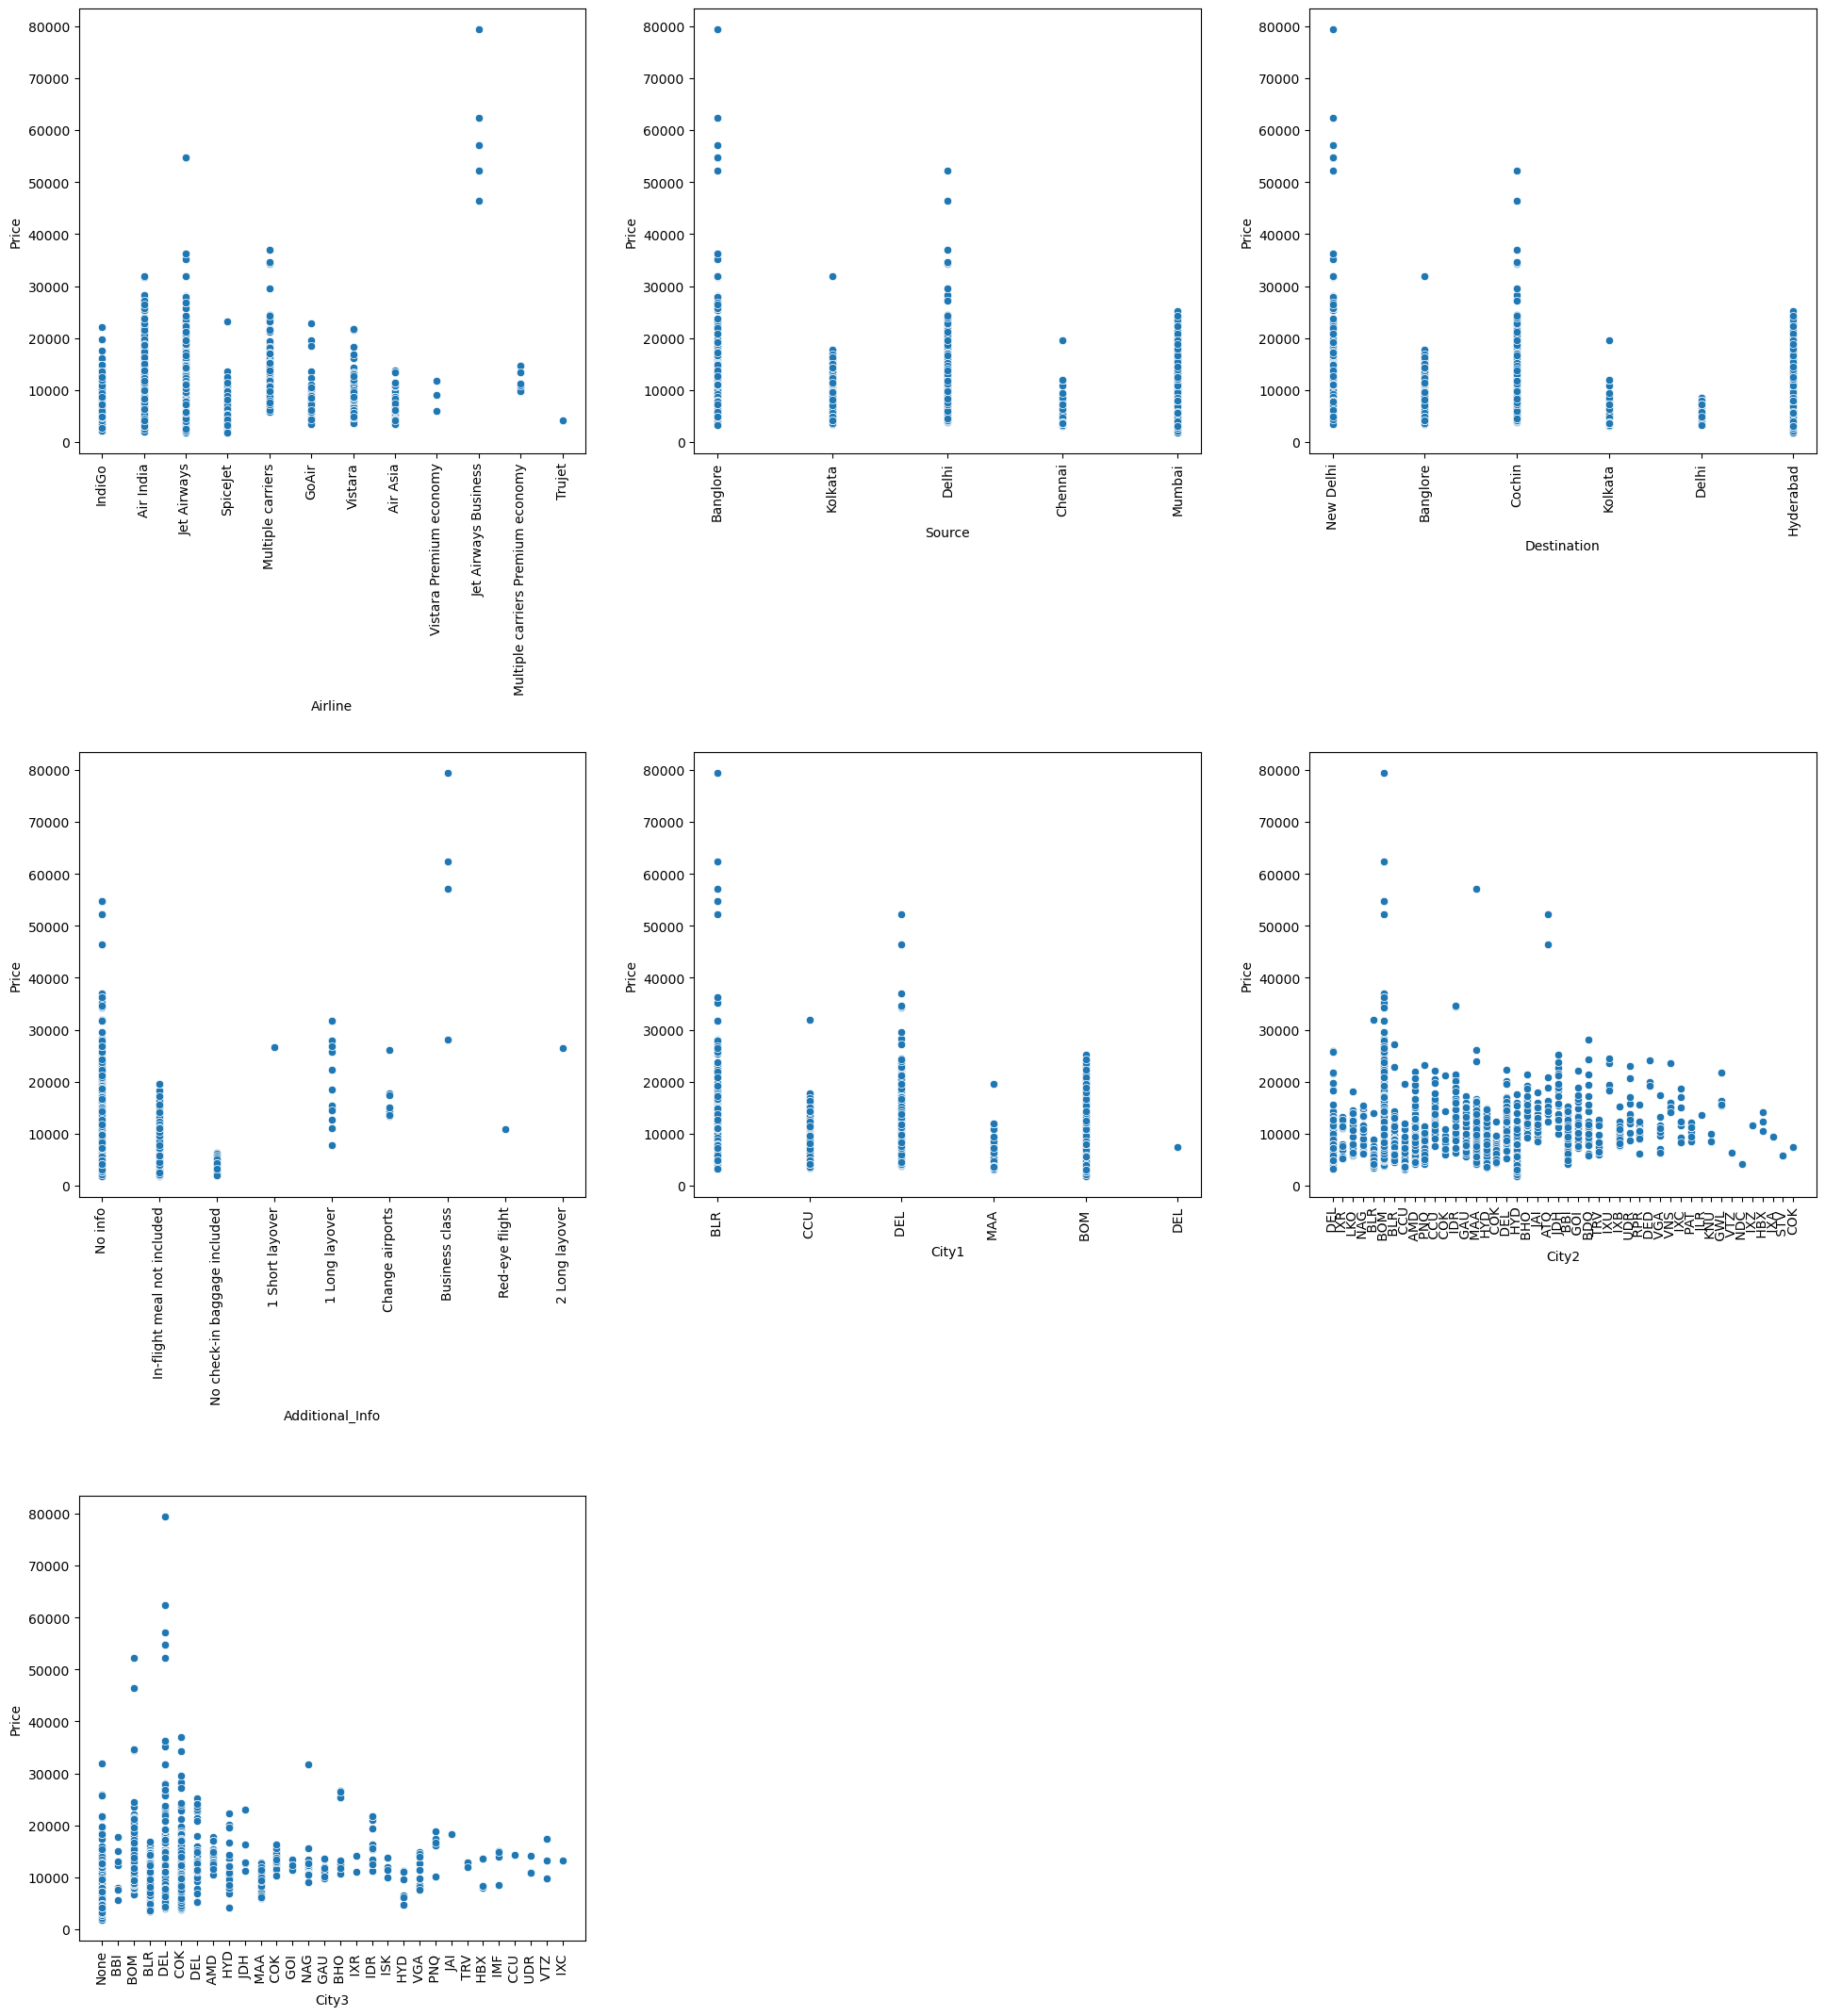

In [209]:
# Checking for relation of prices with categorical data

c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = data[i], y = data.Price )
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

In [210]:
#Checking flights with high prices

data[data.Price>=50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,1,3,2019,BLR,BOM,DEL,5,45,1,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,18,40,16,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,22,50,16,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,2019,BLR,BOM,DEL,5,45,1,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,2019,BLR,BOM,DEL,5,45,1,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1,No info,54826,1,3,2019,BLR,BOM,DEL,16,55,1,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,6,3,2019,DEL,ATQ,BOM,20,5,7,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,2019,BLR,MAA,DEL,9,45,1,14,25,4,40


### Observation

- We observe that the flights with high prices are 8 in number.
- Majority of these flights fly from the same route - BLR->BOM->DEL
- Majority of the flights belong to Business class
- All the flights have Airlines as Jet airways.
- All of these flights took flight in March


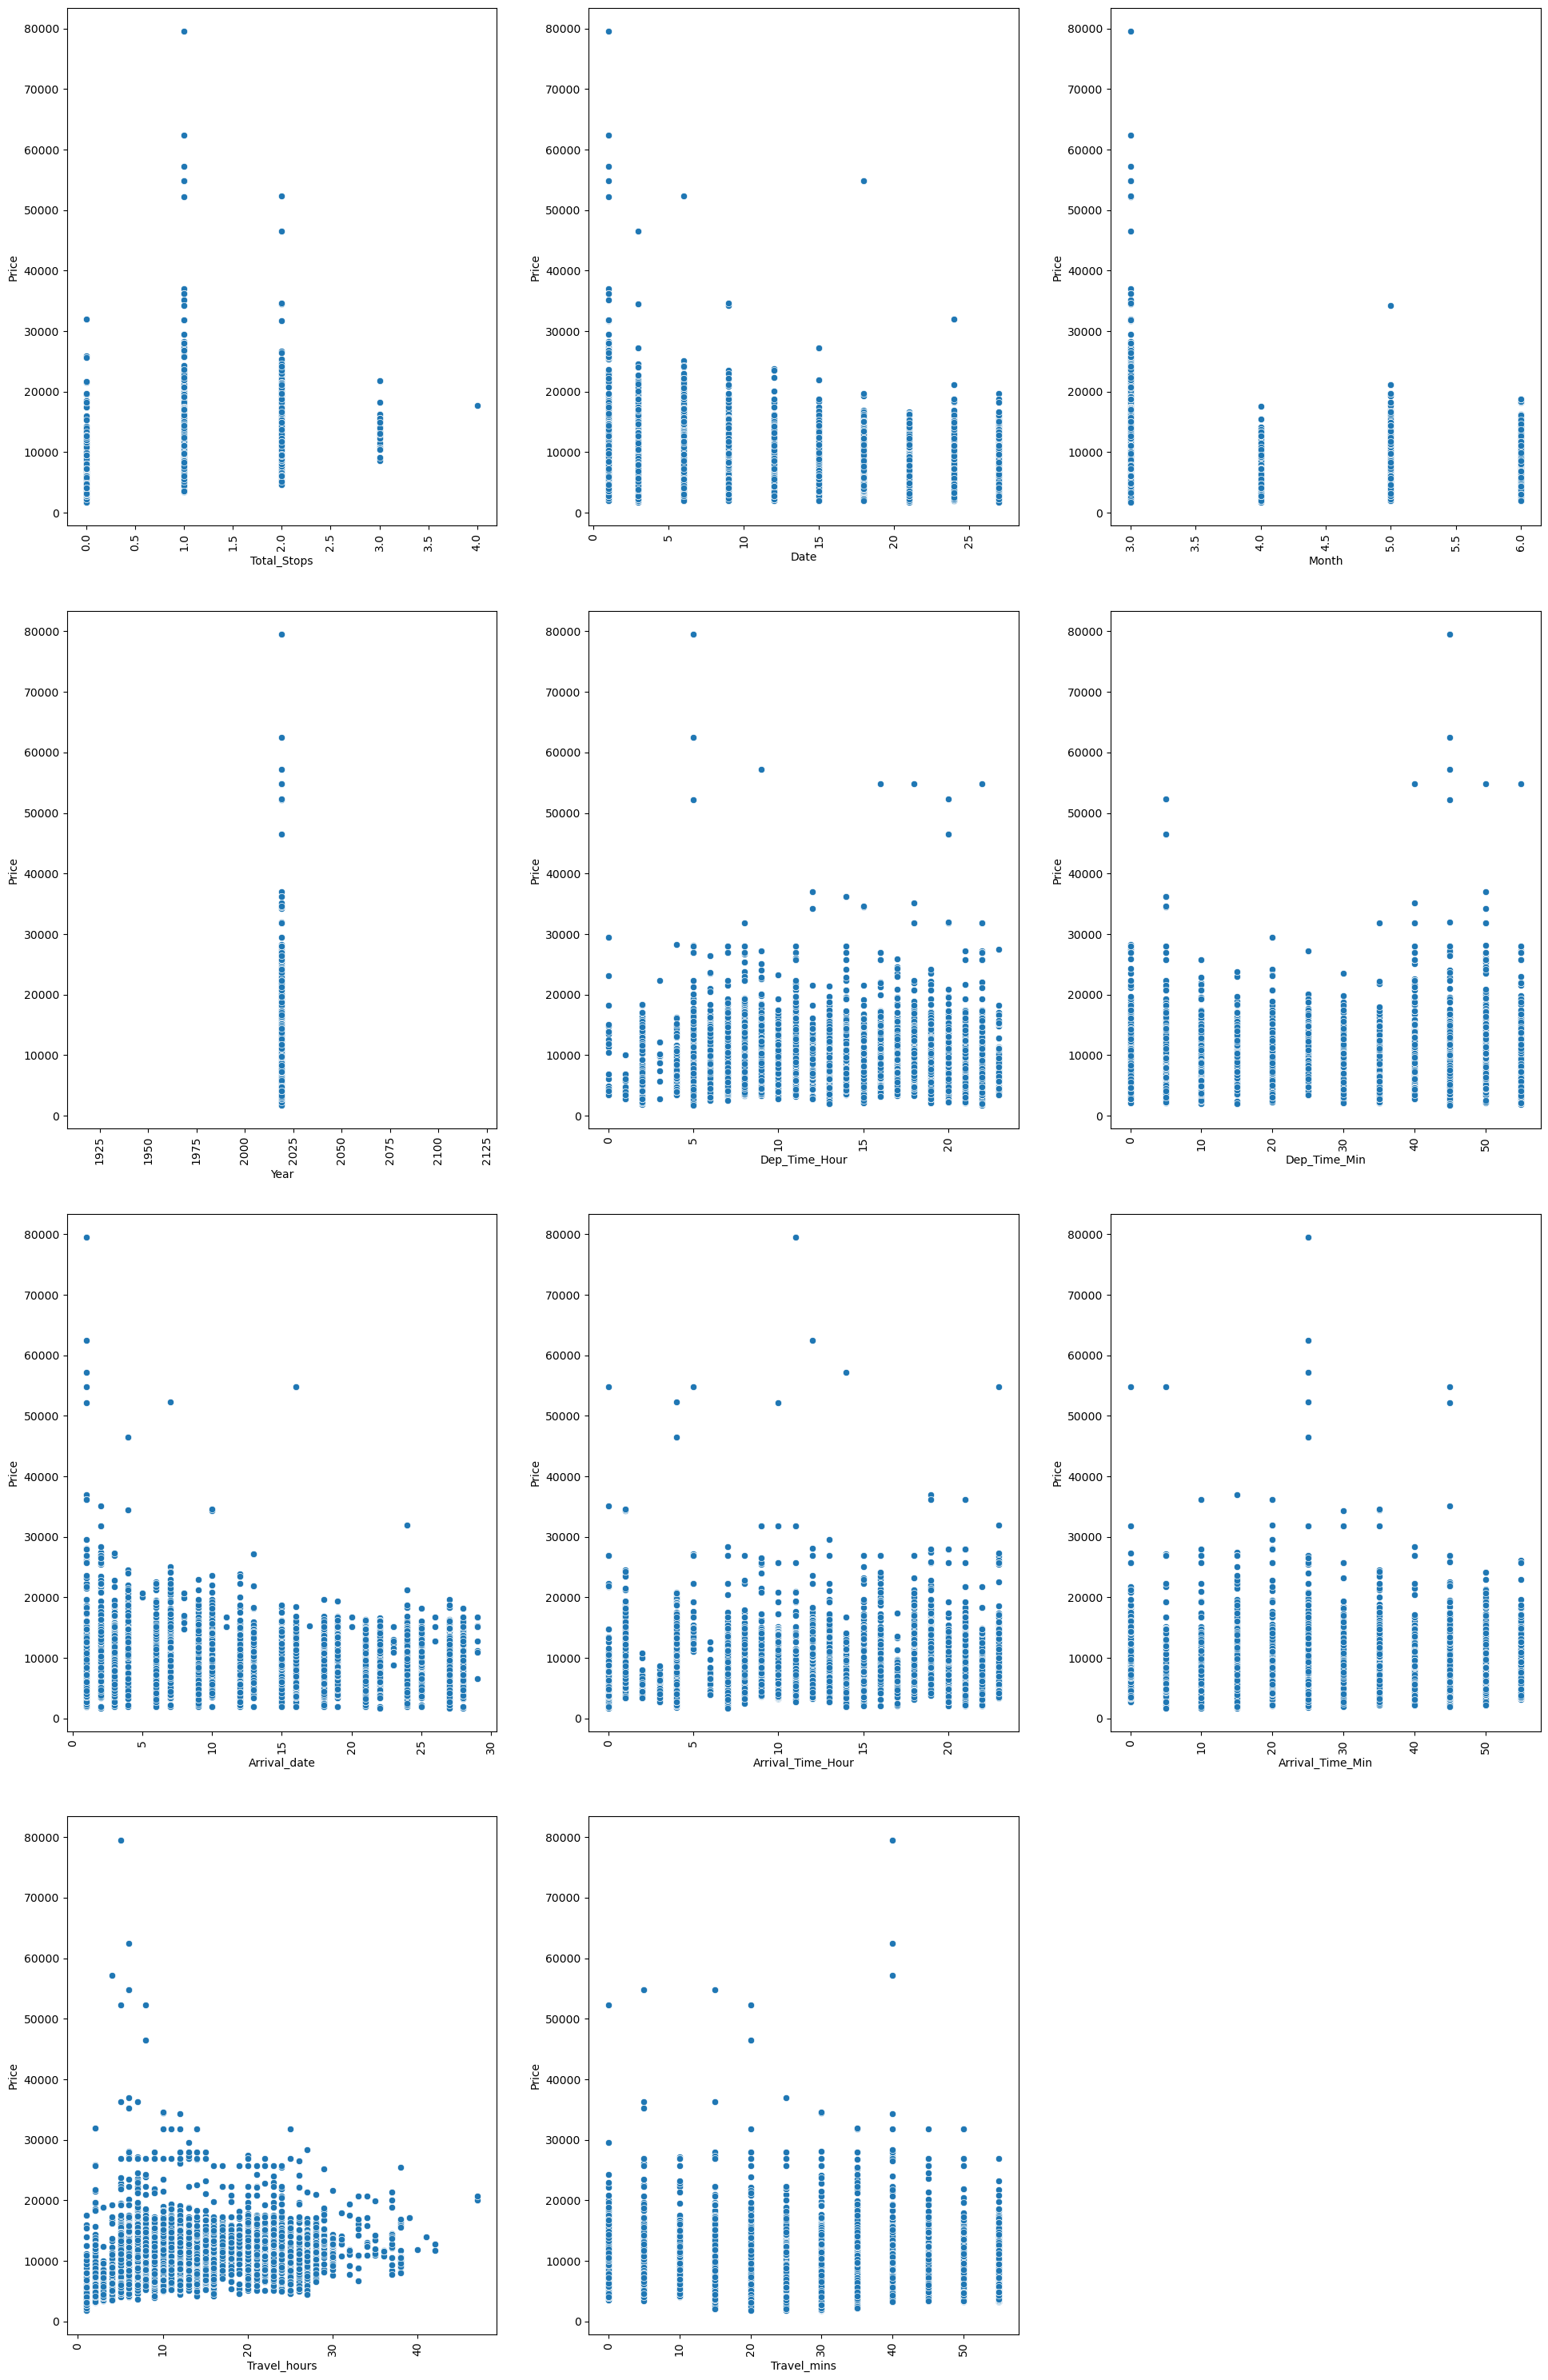

In [211]:
#Checking relation of price with numerical columns

c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = data[i], y = data.Price )
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Dropping the unnecessary columns which are not impacting the price of the flights

In [212]:
data.drop(['Dep_Time_Min','Arrival_Time_Min','Travel_mins','Year', 'City1'], axis =1, inplace = True)

In [213]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,DEL,None,22,22,1,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,IXR,BBI,5,1,13,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,LKO,BOM,9,10,4,19
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,NAG,BLR,18,12,23,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,NAG,DEL,16,1,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,BLR,None,19,9,22,2
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,BLR,None,20,27,23,2
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,DEL,None,8,27,11,3
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,DEL,None,11,1,14,2


We have received our final set of data to further treat.

## Checking outliers using boxplot

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   City2              10682 non-null  object
 9   City3              10682 non-null  object
 10  Dep_Time_Hour      10682 non-null  int64 
 11  Arrival_date       10682 non-null  int64 
 12  Arrival_Time_Hour  10682 non-null  int64 
 13  Travel_hours       10682 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


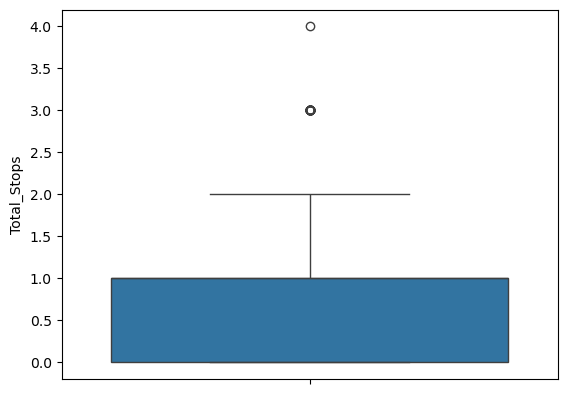

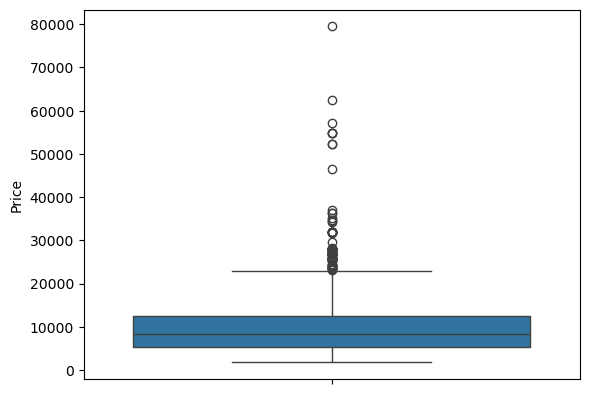

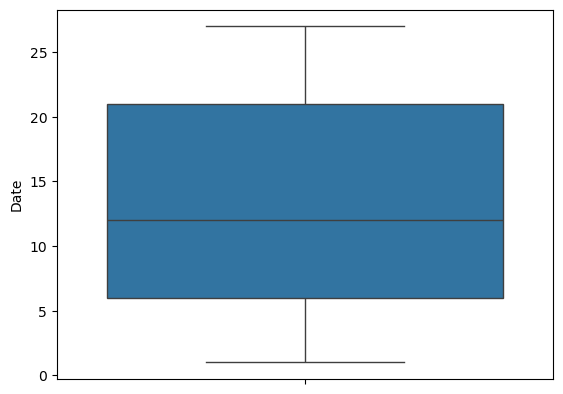

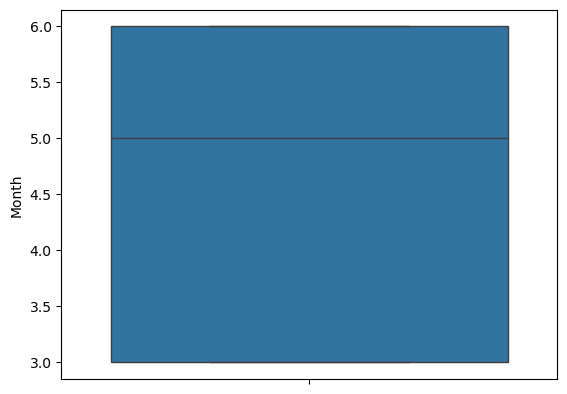

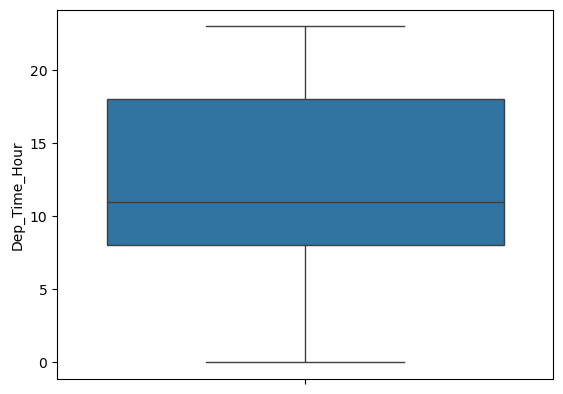

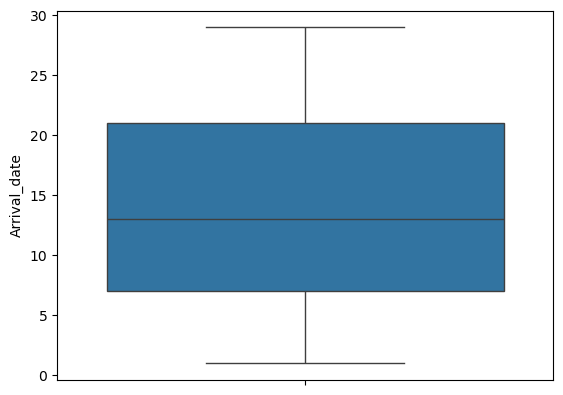

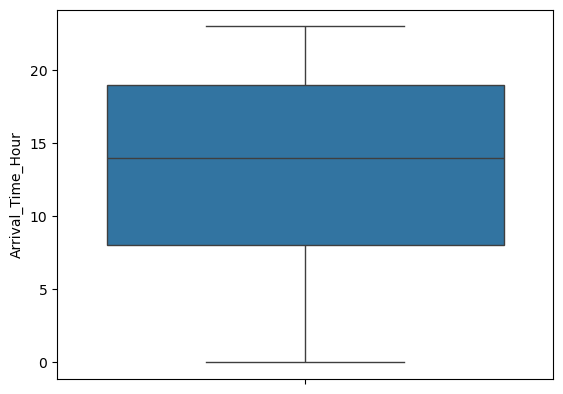

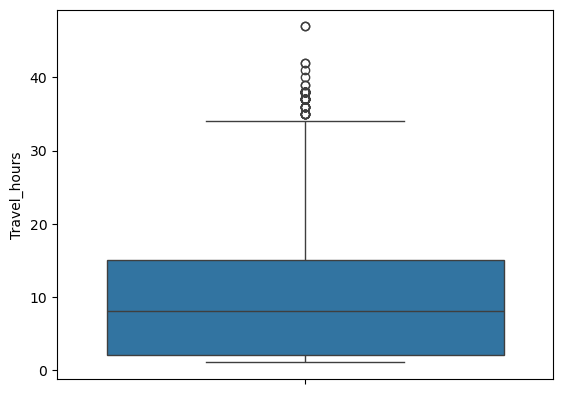

In [215]:
for i in data.columns:
    if data[i].dtype == 'int64':
        sns.boxplot(data[i])
        plt.show()

### Skewness treatment

In [216]:
data.skew(numeric_only=True)

Total_Stops          0.317345
Price                1.813248
Date                 0.118174
Month               -0.387708
Dep_Time_Hour        0.113224
Arrival_date         0.119667
Arrival_Time_Hour   -0.369876
Travel_hours         0.850822
dtype: float64

In [217]:
#Using log transform to treat skewness in the data

data.Travel_hours = np.log(data.Travel_hours)

In [218]:
data.Travel_hours.skew()

-0.26612233332369917

Skewness in relevant columns has successfully been treated.

# Encoding the categorical data

In [219]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [220]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        data[i] = le.fit_transform(data[i])

Airline
Source
Destination
Additional_Info
City2
City3


In [221]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,3,0,5,0,7,3897,24,3,13,29,22,22,1,0.693147
1,1,3,0,2,7,7662,1,5,25,1,5,1,13,1.945910
2,4,2,1,2,7,13882,9,6,32,4,9,10,4,2.944439
3,3,3,0,1,7,6218,12,5,34,3,18,12,23,1.609438
4,3,0,5,1,7,13302,1,3,34,8,16,1,21,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,4107,9,4,5,29,19,9,22,0.693147
10679,1,3,0,0,7,4145,27,4,5,29,20,27,23,0.693147
10680,4,0,2,0,7,7229,27,4,13,29,8,27,11,1.098612
10681,10,0,5,0,7,12648,1,3,13,29,11,1,14,0.693147


# Scaling the data

In [222]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [223]:
ds_x = data.drop('Price', axis = 1)
y = data['Price']

In [224]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [225]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,-0.410805,-1.658435,2.416778,-1.220477,0.498649,1.237288,-1.467707,0.137204,1.395015,1.654268,0.955750,-1.800319,-1.183304
1,-1.261152,0.890299,-0.973732,1.741835,0.498649,-1.475307,0.250153,1.634890,-1.082280,-1.303000,-1.524648,-0.050813,0.052178
2,0.014369,0.040721,-0.295630,1.741835,0.498649,-0.531796,1.109082,2.508541,-0.816856,-0.607172,-0.461621,-1.362943,1.036933
3,-0.410805,0.890299,-0.973732,0.260679,0.498649,-0.177979,0.250153,2.758155,-0.905330,0.958440,-0.225392,1.407109,-0.279653
4,-0.410805,-1.658435,2.416778,0.260679,0.498649,-1.475307,-1.467707,2.758155,-0.462956,0.610527,-1.524648,1.115525,-0.499718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-1.220477,0.498649,-0.531796,-0.608777,-0.861254,1.395015,1.132397,-0.579735,1.261317,-1.183304
10678,-1.261152,0.890299,-0.973732,-1.220477,0.498649,1.591104,-0.608777,-0.861254,1.395015,1.306354,1.546321,1.407109,-1.183304
10679,0.014369,-1.658435,0.382472,-1.220477,0.498649,1.591104,-0.608777,0.137204,1.395015,-0.781129,1.546321,-0.342397,-0.783432
10680,2.565411,-1.658435,2.416778,-1.220477,0.498649,-1.475307,-1.467707,0.137204,1.395015,-0.259258,-1.524648,0.094979,-1.183304


We have successfully transformed our data to a similar scale

# Fitting the regression models

In [226]:
#Importing the ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [227]:
#Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR()
lr = LinearRegression()

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
for i in [dt, svr, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

SVR()
R2 score is  0.060432458295951674
R2 for train data 0.05381545789557396
Mean absolute error is  3360.839385854819
Mean squared error is  19019637.68217035
Root mean squared error is  4361.1509584248915
------------------------------------------
LinearRegression()
R2 score is  0.5143383642868745
R2 for train data 0.4883941656291312
Mean absolute error is  2266.0073601447602
Mean squared error is  9831233.985202333
Root mean squared error is  3135.479865220367
------------------------------------------


# Cross validation of Random forest and gradient boosting models

In [229]:
#Importing cross val score from Model_selection

from sklearn.model_selection import cross_val_score

In [230]:
for i in range(2,9):
    cv = cross_val_score(dt, x, y, cv=i)
    print(dt, cv.mean())

DecisionTreeRegressor() 0.7556545846428251
DecisionTreeRegressor() 0.7795858596380157
DecisionTreeRegressor() 0.7777689153479104
DecisionTreeRegressor() 0.7907506642007501
DecisionTreeRegressor() 0.8102495763722461
DecisionTreeRegressor() 0.8024839153026326
DecisionTreeRegressor() 0.8083726858636422


In [231]:
for i in range(2,9):
    cv = cross_val_score(dt, x, y, cv=i)
    print(dt, cv.mean())

DecisionTreeRegressor() 0.7535184612985126
DecisionTreeRegressor() 0.7822067429309799
DecisionTreeRegressor() 0.7730013337089097
DecisionTreeRegressor() 0.8184828326842009
DecisionTreeRegressor() 0.8132362028011123
DecisionTreeRegressor() 0.8072279649548701
DecisionTreeRegressor() 0.8173929745757536


# Hypertuning the best model

In [232]:
from sklearn.model_selection import GridSearchCV

In [233]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [234]:
param_grid = {'max_depth':[None,1,2,3],'min_samples_split':[2,4,10]}

gcv_dt = GridSearchCV(dt,param_grid, cv=3)

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [236]:
#Fitting the model

res = gcv_dt.fit(x_train,y_train)

In [237]:
#Checking best params

res.best_params_

{'max_depth': None, 'min_samples_split': 10}

In [238]:
res.best_score_

0.8064824546316997

In [239]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [240]:
#Fitting the model

res2 = gcv_dt.fit(x_train,y_train)

In [241]:
res2.best_params_

{'max_depth': None, 'min_samples_split': 10}

In [242]:
res2.best_score_

0.8061590926011309

In [243]:
model = DecisionTreeRegressor(max_depth= None, min_samples_split= 10)

# Saving the best model using joblib

In [244]:
import joblib

joblib.dump(model, 'flight_price.obj')

['flight_price.obj']

# Comparing the predicted and actual prices

In [245]:
#Creating a dataframe with actual and predicted values

predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':pred})

In [246]:
predicted_values

,Actual,Predicted
8161,10703,12212.106065
6423,13587,10747.029343
3102,12819,11498.556327
5797,8610,5181.199574
7180,14714,9450.718221
...,...,...
2216,3210,8674.950109
5327,1965,9629.006530
5663,8479,4912.736182
6160,11467,3940.402644
